   Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0        4.0   
1     

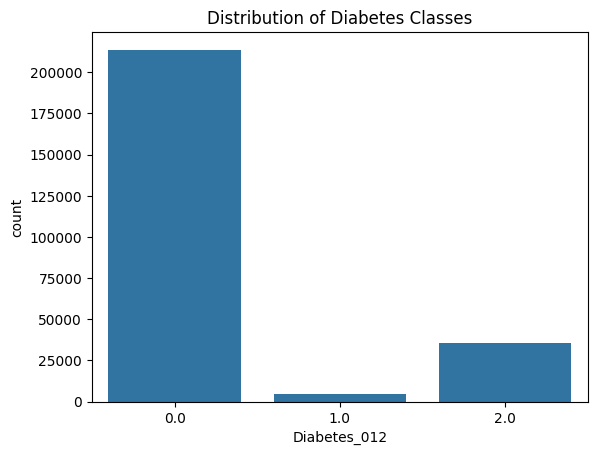

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


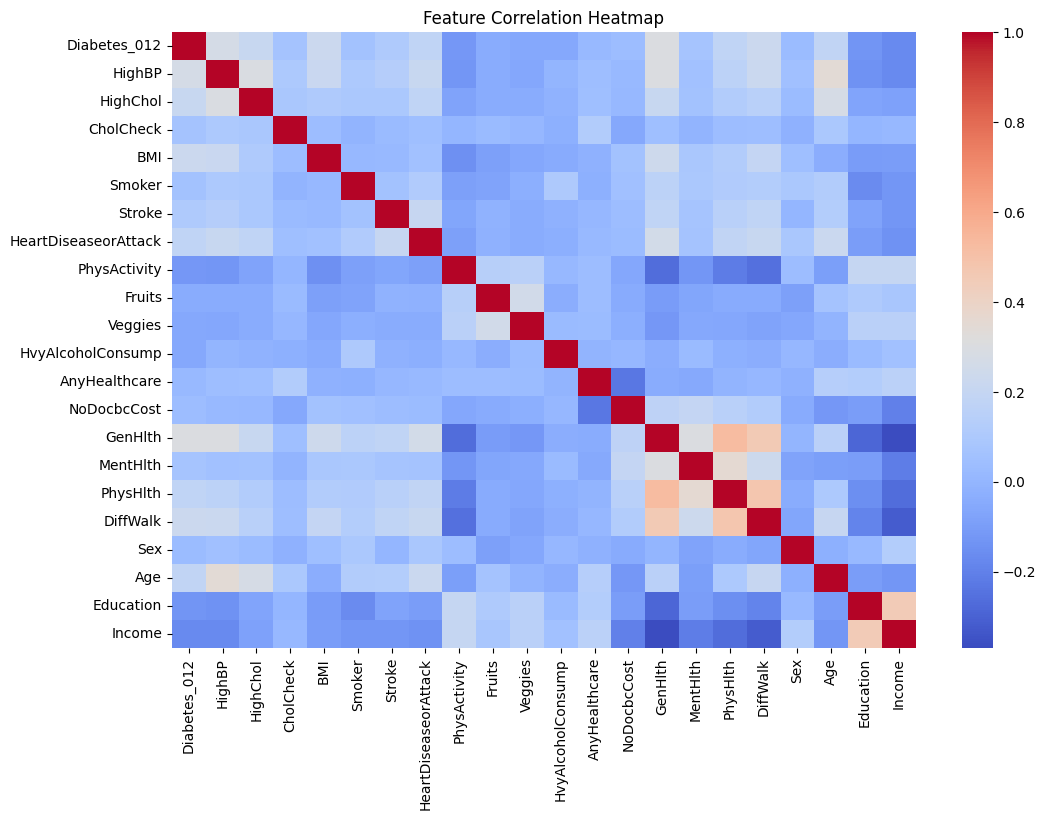

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load your data (replace with your file path or DataFrame)
df = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')

# Quick look at the data
print(df.head())
print(df.info())

# Target variable distribution
sns.countplot(x='Diabetes_012', data=df)
plt.title('Distribution of Diabetes Classes')
plt.show()

# Check for missing values
print(df.isnull().sum())

# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# Pairplot for a subset of features
# sns.pairplot(df, hue='Diabetes_012', vars=['BMI','Age','HighBP','HighChol'])
# plt.show()


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Features and target
X = df.drop('Diabetes_012', axis=1)
y = df['Diabetes_012']

# Train-test split (stratify to preserve class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

lr = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr, digits=3))


c:\Users\Maryna24\Desktop\Factoria\Proyectos\MODULOII\multiclase-classifier_e2\multiclase-classifier_e2\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression Classification Report:
              precision    recall  f1-score   support

         0.0      0.862     0.975     0.915     53426
         1.0      0.000     0.000     0.000      1158
         2.0      0.515     0.175     0.262      8836

    accuracy                          0.846     63420
   macro avg      0.459     0.383     0.392     63420
weighted avg      0.798     0.846     0.807     63420



c:\Users\Maryna24\Desktop\Factoria\Proyectos\MODULOII\multiclase-classifier_e2\multiclase-classifier_e2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Maryna24\Desktop\Factoria\Proyectos\MODULOII\multiclase-classifier_e2\multiclase-classifier_e2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Maryna24\Desktop\Factoria\Proyectos\MODULOII\multiclase-classifier_e2\multiclase-classifier_e2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarnin

In [6]:
from xgboost import XGBClassifier

xgb = XGBClassifier(objective='multi:softmax', num_class=3, eval_metric='mlogloss', use_label_encoder=False)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb, digits=3))


c:\Users\Maryna24\Desktop\Factoria\Proyectos\MODULOII\multiclase-classifier_e2\multiclase-classifier_e2\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:59:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Classification Report:
              precision    recall  f1-score   support

         0.0      0.864     0.977     0.917     53426
         1.0      0.000     0.000     0.000      1158
         2.0      0.548     0.188     0.280      8836

    accuracy                          0.849     63420
   macro avg      0.471     0.388     0.399     63420
weighted avg      0.804     0.849     0.811     63420



<Figure size 1000x600 with 0 Axes>

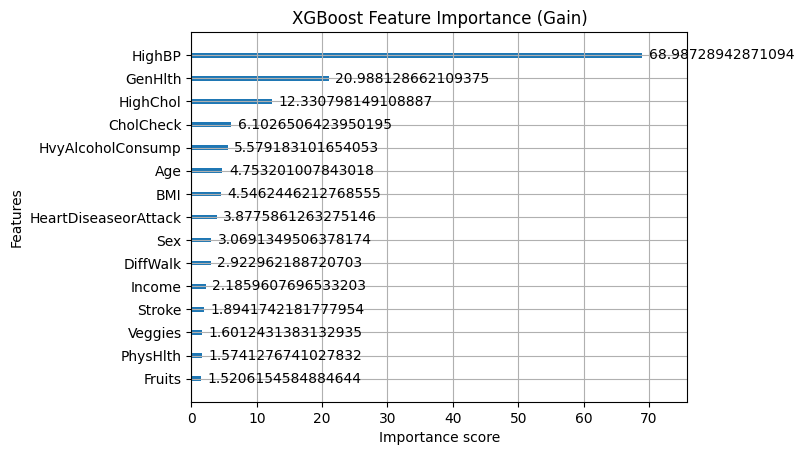

In [7]:
from xgboost import plot_importance

# Plot feature importance
plt.figure(figsize=(10, 6))
plot_importance(xgb, importance_type='gain', max_num_features=15)  # 'gain' is the most informative
plt.title('XGBoost Feature Importance (Gain)')
plt.show()


In [8]:
# Create a new dataframe with only the top 10 features
top_features = ['HighBP', 'GenHlth', 'HighChol', 'CholCheck', 'HvyAlcoholConsump',
                'Age', 'BMI', 'HeartDiseaseorAttack', 'Sex', 'DiffWalk']

# Select only these features
X_top = df[top_features]
y = df['Diabetes_012']

# Check class distribution
print("Class distribution:")
print(y.value_counts())
print(y.value_counts(normalize=True).round(3))

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_top, y, test_size=0.25, random_state=42, stratify=y)



Class distribution:
Diabetes_012
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64
Diabetes_012
0.0    0.842
2.0    0.139
1.0    0.018
Name: proportion, dtype: float64



Class distribution after undersampling:
Diabetes_012
0.0    50000
2.0    26510
1.0     3473
Name: count, dtype: int64

Class distribution after complete resampling:
Diabetes_012
0.0    50000
1.0    40000
2.0    35000
Name: count, dtype: int64


c:\Users\Maryna24\Desktop\Factoria\Proyectos\MODULOII\multiclase-classifier_e2\multiclase-classifier_e2\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:59:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Classification Report:
              precision    recall  f1-score   support

         0.0      0.979     0.355     0.521     53426
         1.0      0.021     0.600     0.041      1158
         2.0      0.333     0.428     0.375      8836

    accuracy                          0.370     63420
   macro avg      0.444     0.461     0.312     63420
weighted avg      0.871     0.370     0.492     63420


Confusion Matrix:
[[18968 27238  7220]
 [   97   695   366]
 [  317  4735  3784]]

Classification Report with Adjusted Thresholds:
              precision    recall  f1-score   support

         0.0      0.983     0.279     0.434     53426
         1.0      0.020     0.734     0.040      1158
         2.0      0.365     0.277     0.315      8836

    accuracy                          0.287     63420
   macro avg      0.456     0.430     0.263     63420
weighted avg      0.880     0.287     0.411     63420


Confusion Matrix:
[[14898 34516  4012]
 [   73   850   235]
 [  180  6212  2444]]

<Figure size 1000x600 with 0 Axes>

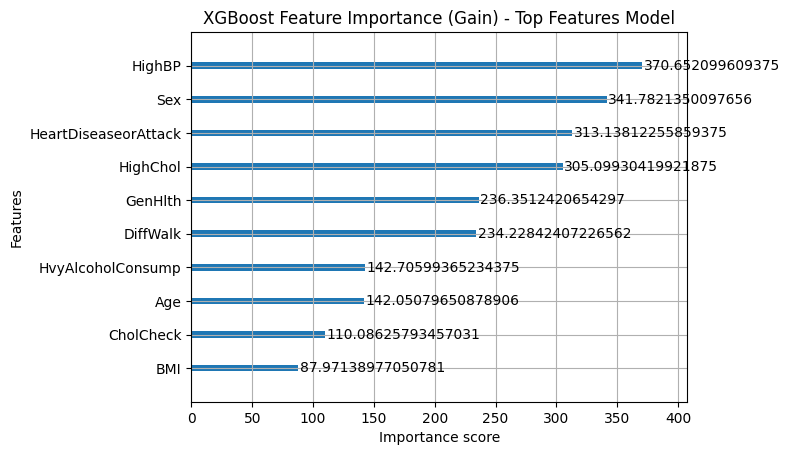

In [9]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import pandas as pd
import joblib

# Step 1: Undersample the majority class (class 0)
# Let's reduce class 0 to a more manageable size while keeping it the largest class
undersampler = RandomUnderSampler(sampling_strategy={0: 50000}, random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)

# Check the distribution after undersampling
print("\nClass distribution after undersampling:")
print(pd.Series(y_train_under).value_counts())

# Step 2: Oversample the minority classes, especially class 1
# Since class 1 is severely underrepresented, let's boost it significantly
oversampler = SMOTE(sampling_strategy={1: 40000, 2: 35000}, random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_under, y_train_under)

# Check the distribution after oversampling
print("\nClass distribution after complete resampling:")
print(pd.Series(y_train_resampled).value_counts())



# 2. Train XGBoost with special focus on class 1
# We'll use different class weights to emphasize class 1
class_weights = {0: 1.0, 1: 10.0, 2: 3.0}  # Emphasize class 1 heavily
sample_weights = np.ones(len(y_train_resampled))
for cls, weight in class_weights.items():
    sample_weights[y_train_resampled == cls] = weight

# Train with class weights
xgb = XGBClassifier(
    objective='multi:softmax',
    num_class=3,
    eval_metric='mlogloss',
    use_label_encoder=False,
    max_depth=4,          # Prevent overfitting with a moderate depth
    n_estimators=300,     # More trees for better learning
    learning_rate=0.05,   # Slower learning rate for better generalization
    subsample=0.8,        # Reduce overfitting
    colsample_bytree=0.8, # Reduce overfitting
    min_child_weight=5    # Helps with imbalanced data
)

xgb.fit(X_train_resampled, y_train_resampled, sample_weight=sample_weights)

joblib.dump(xgb, 'xgb_model.joblib')

# 3. Evaluate with focus on class 1
y_pred = xgb.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=3))
# 5. Check confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# 4. Adjust prediction threshold specifically for class 1
y_proba = xgb.predict_proba(X_test)

# Lower the threshold for class 1 to increase its prediction frequency
adjusted_preds = np.zeros(len(y_test), dtype=int)
for i in range(len(y_test)):
    proba = y_proba[i]
    # Boost probability for class 1 by 50%
    proba[1] *= 1.50
    adjusted_preds[i] = np.argmax(proba)

print("\nClassification Report with Adjusted Thresholds:")
print(classification_report(y_test, adjusted_preds, digits=3))

# 5. Check confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, adjusted_preds))

# 6. Plot feature importance for the new model
plt.figure(figsize=(10, 6))
plot_importance(xgb, importance_type='gain', max_num_features=10)
plt.title('XGBoost Feature Importance (Gain) - Top Features Model')
plt.show()

class AdjustedXGBClassifier:
    def __init__(self, model, boost_class=1, boost_factor=1.5):
           self.model = model
           self.boost_class = boost_class
           self.boost_factor = boost_factor
    def predict(self, X):
           proba = self.model.predict_proba(X)
           proba[:, self.boost_class] *= self.boost_factor
           return np.argmax(proba, axis=1)
    def predict_proba(self, X):
        return self.model.predict_proba(X)
    
#xgb_loaded = joblib.load('xgb_model.joblib')
#adj_model = AdjustedXGBClassifier(xgb_loaded, boost_class=1, boost_factor=1.5)
#y_pred = adj_model.predict(X_new)
